# The Sparks Foundations IOT and CV intern
## Task-1 Object Detetion
                                                                                                            By : 
                                                                                                            Thejaswin.S

**Load required packages**

In [16]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

**Loading yolov3 weights, yolov3 config and coco.names files**

In [17]:
weights = 'yolov3.weights'
cfg = 'yolov3.cfg'
names = 'coco.names'

**Loading and printing image class names from the coco.names file**

In [18]:
classes = []
with open(names, "r") as f:
    classes = [line.strip() for line in f.readlines()]
print(classes)

#load our YOLO object detector trained on COCO dataset (80 classes)
net = cv2.dnn.readNet(weights, cfg)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


**Constructing a blob from the input image and then perform a forward pass of the YOLO object detector, giving us our bounding boxes and associated probabilities.Showing the number of objects detected and populate lists boxes, confidences and class_ids for YOLO.Applying non-maxima suppression suppresses significantly overlapping bounding boxes, keeping only the most confident ones.we simply draw the bounding box and text on image using random class colors and finally diaplay resulting image.**

In [19]:
def out(IMAGE):
    try:
        img = cv2.imread(IMAGE)
        img = cv2.resize(img, None, fx = 0.6, fy = 0.6)
    except Exception as e:
         print(str(e))
#cv2.imshow("Image", img)
    height, width, channels = img.shape
    plt.imshow(img)
    plt.show()
    layer_names = net.getLayerNames()
    output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
    colors = np.random.uniform(0, 255, size = (len(classes), 2))
    blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop = False)
    #Print the blobs detected
    net.setInput(blob)
    outs = net.forward(output_layers)
   #print(outs)
    confidences = list()
    boxes = list()
    class_ids = list()

    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
        
            if confidence > 0.3:
            
            #Object detected
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

            #Rectangle Coordinates
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append((float(confidence)))
                class_ids.append(class_id)

            #cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 2)
            #cv2.circle(img, (center_x, center_y), 10, (0, 0, 255), 2)

    number_objects_detected = len(boxes)
    print("Total number of objects detected is:", len(boxes))
    
    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.5)
    print("Indices after non-max suppression are:", indexes, sep = "\n")
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            print("Labels of the Object detected is:", label)
            color = colors[i]
            cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
            #scale = 1 # this value can be from 0 to 1 (0,1] to change the size of the text relative to the image
            #fontScale = min(width,height)/(25/scale)
            cv2.putText(img, label, (x, y + 30), cv2.FONT_HERSHEY_PLAIN, 3, color, 3)
            
    cv2.imshow("image", img)
    #cv2.namedWindow('image',cv2.WINDOW_NORMAL)
    #cv2.resizeWindow('image', 1000,1000)
    plt.imshow(img)
    plt.show()
    cv2.waitKey(0)
    cv2.destroyAllWindows()       

    

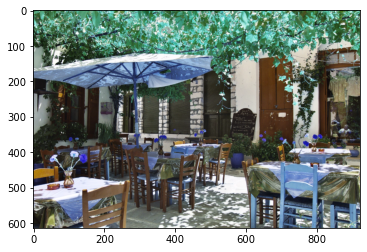

Total number of objects detected is: 38
Indices after non-max suppression are:
[[36]
 [23]
 [13]
 [18]
 [17]
 [ 4]
 [33]
 [21]
 [11]
 [ 6]
 [ 1]
 [31]
 [29]
 [12]]
Labels of the Object detected is: diningtable
Labels of the Object detected is: chair
Labels of the Object detected is: pottedplant
Labels of the Object detected is: chair
Labels of the Object detected is: chair
Labels of the Object detected is: chair
Labels of the Object detected is: chair
Labels of the Object detected is: chair
Labels of the Object detected is: chair
Labels of the Object detected is: chair
Labels of the Object detected is: chair
Labels of the Object detected is: vase
Labels of the Object detected is: chair
Labels of the Object detected is: vase


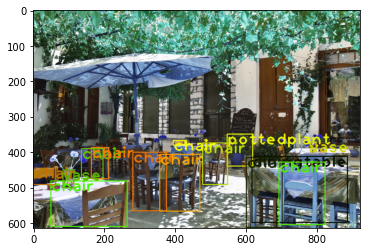

In [20]:
out('2.jpg')

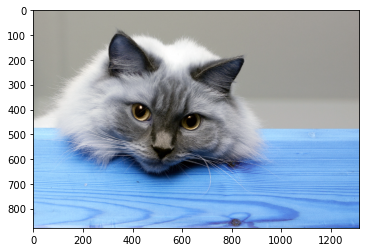

Total number of objects detected is: 6
Indices after non-max suppression are:
[[1]]
Labels of the Object detected is: cat


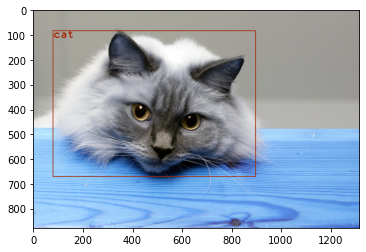

In [21]:
out('cat.jpg')

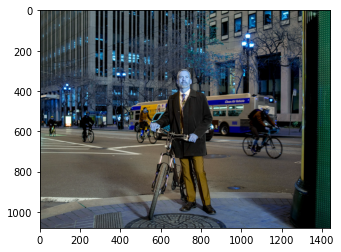

Total number of objects detected is: 39
Indices after non-max suppression are:
[[20]
 [35]
 [ 5]
 [ 9]
 [31]
 [ 3]
 [17]
 [15]
 [10]
 [26]
 [32]
 [28]
 [34]]
Labels of the Object detected is: truck
Labels of the Object detected is: person
Labels of the Object detected is: person
Labels of the Object detected is: person
Labels of the Object detected is: bicycle
Labels of the Object detected is: person
Labels of the Object detected is: bicycle
Labels of the Object detected is: bicycle
Labels of the Object detected is: person
Labels of the Object detected is: person
Labels of the Object detected is: bicycle
Labels of the Object detected is: car
Labels of the Object detected is: bicycle


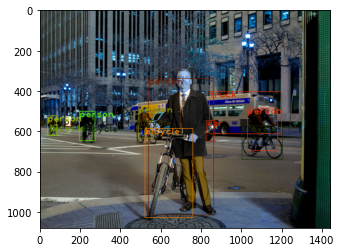

In [22]:
out('test1.jpg')